## **Decision Tree for Classification**

In [4]:
# Câu hỏi 1
import numpy as np

def entropy(p1, p2):
    if p1 == 0 or p2 == 0:
        return 0
    return - (p1 * np.log2(p1) + p2 * np.log2(p2))

entropy_1 = entropy(1/2, 1/2)

entropy_1

1.0

In [5]:
# Câu hỏi 2
def gini(p1, p2):
    return 1 - p1**2 - p2**2

gini_1 = gini(3/5, 2/5)

gini_1

0.48

In [6]:
# Câu hỏi 3
p_eng_raise = 1/2
p_eng_notraise = 1/2
p_noteng_raise = 1/3
p_noteng_notraise = 2/3

gini_eng = gini(p_eng_notraise, p_eng_raise)
gini_noteng = gini(p_noteng_notraise, p_noteng_raise)

gini_total = 2/5*gini_eng + 3/5*gini_noteng

gini_total

0.4666666666666667

In [21]:
# Câu hỏi 4
p_lower26_raise = 0
p_lower26_notraise = 1
p_higher26_raise = 2/3
p_higher26_notraise = 1/3

gini_lower26 = gini(p_lower26_raise, p_lower26_notraise)
gini_higher26 = gini(p_higher26_raise, p_higher26_notraise)

gini_age26 = 2/5*gini_lower26 + 3/5*gini_higher26

gini_age26

0.26666666666666666

In [23]:
# Câu hỏi 5
entropy_raise = entropy(2/5, 3/5)

entropy_raise

0.9709505944546686

In [34]:
# Câu hỏi 6
entropy_noteng = entropy(2/3, 1/3)
entropy_eng = entropy(1/2, 1/2)  

gini_eng = 1 - 2/5*entropy_eng - 3/5*entropy_noteng

gini_eng

0.04902249956730631

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

data = {'age': [23, 25, 27, 29, 29],
        'likes english': [0, 1, 1, 0, 0],
        'likes ai': [0, 1, 0, 1, 0],
        'raise salary': [0, 0, 1, 1, 0]}

# load data
df = pd.DataFrame(data)

# get value and convert to numpy
X = df[['age', 'likes english', 'likes ai']].values
y = df[['raise salary']].values.reshape(-1,)

# define classifier
clf = DecisionTreeClassifier()

# train
clf = clf.fit(X, y)

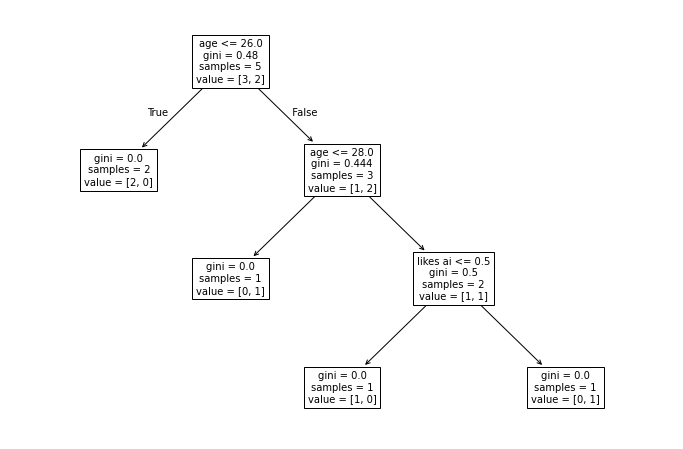

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# visualization
plt.figure(figsize = (12, 8))
plot_tree(clf, feature_names=['age', 'likes english', 'likes ai'], fontsize=10)
plt.show()

In [35]:
# Câu hỏi 7+8
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import DecisionTreeClassifier

# Load the diabetes dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X, iris_y, test_size=0.2, random_state=42
)

# Define model
dt_classifier = DecisionTreeClassifier()

# Train
dt_classifier.fit(X_train, y_train)

# Preidct and evaluate
y_pred = dt_classifier.predict(X_test)
accuracy_score( y_test, y_pred)

1.0

## **Decision Tree for Regression**

In [36]:
data = {'age': [23, 25, 27, 29, 29],
        'likes english': [0, 1, 1, 0, 0],
        'likes ai': [0, 1, 0, 1, 0],
        'salary': [200, 400, 300, 500, 400]}

# load data
df = pd.DataFrame(data)

In [37]:
def cal_sse(subset):
    if len(subset) == 0:
        return 0
    mean_value = np.mean(subset)
    return sum((x - mean_value) ** 2 for x in subset)

In [46]:
# Câu hỏi 9
salary_likes_ai = df[df['likes ai'] == 1]['salary']
salary_not_likes_ai = df[df['likes ai'] == 0]['salary']

sse_likes_ai = cal_sse(salary_likes_ai)
sse_not_likes_ai = cal_sse(salary_not_likes_ai)

len_ai = len(df[df['likes ai'] == 1])
len_not_ai = len(df[df['likes ai'] == 0])

sse_ai = sse_likes_ai*1/len_ai + sse_not_likes_ai*1/len_not_ai

sse_ai

9166.666666666668

In [47]:
# Câu hỏi 10
salary_lower_24 = df[df['age'] <= 24]['salary']
salary_higher_24 = df[df['age'] > 24]['salary']

sse_lower_24 = cal_sse(salary_lower_24)
sse_higher_24 = cal_sse(salary_higher_24)

len_lower_24 = len(df[df['age'] <= 24])
len_higher_24 = len(df[df['age'] > 24])

sse_24 = sse_lower_24*1/len_lower_24 + sse_higher_24*1/len_higher_24

sse_24

5000.0

In [48]:
# Câu hỏi 11
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

# Load dataset
machine_cpu = fetch_openml(name = "machine_cpu")
machine_data = machine_cpu.data
machine_labels = machine_cpu.target

# Split train : test = 8:2
X_train, X_test, y_train, y_test = train_test_split(machine_data, machine_labels, test_size = 0.2, random_state = 42)

# Define model
tree_reg = DecisionTreeRegressor()

# Train
tree_reg.fit(X_train, y_train)

# Preidct and evaluate
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

c:\Users\LENOVO\anaconda\lib\site-packages\sklearn\datasets\_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name machine_cpu exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=230
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=733

  warn(warning_msg)


9095.029761904761